# Qualitätsanalyse und visuelle Überprüfung annotierter Bilddaten für maschinelles Lernen
select Kernel: Strg + Shift + p


## Ziele dieses Notebooks

- **Darstellung annotierter Bilddaten** zur manuellen Überprüfung
- **Analyse der Klassenverteilung** und Identifikation von Label-Inkonsistenzen
- **Bewertung der Annotationsqualität** (z. B. Positionierung, Boxgröße, Label-Korrektheit)
- **Prüfung der Eignung der Daten** für maschinelles Lernen
- **Demonstration einfacher Verbesserungsschritte** (z. B. Augmentierung)

> Der Fokus liegt auf optischen Bilddaten.

# Grundlagen des maschinellen Lernens

Maschinelles Lernen (ML) ist ein Teilbereich der Künstlichen Intelligenz, bei dem Systeme aus Daten lernen, um Vorhersagen oder Entscheidungen zu treffen. Man unterscheidet ML-Verfahren grob in zwei Hauptkategorien:

---

## 🧩 Supervised vs. Unsupervised Learning

| Merkmal                | Supervised Learning                        | Unsupervised Learning                      |
|------------------------|--------------------------------------------|--------------------------------------------|
| Trainingsdaten         | Mit Labeln versehen                        | Ohne Labels                                 |
| Ziel                   | Vorhersage (z. B. Klasse, Wert)            | Mustererkennung (z. B. Cluster, Strukturen) |
| Beispielaufgaben       | Klassifikation, Regression (kontinuierlich)                | Clustering, Dimensionsreduktion             |
| Annotation erforderlich| ✅ Ja                                      | ❌ Nein                                     |

**Bezug zur Annotation:**  
Supervised Learning benötigt **annotierte Daten**, z. B. "Person erkannt", "Temperaturbereich" oder "Objektklasse". Die Qualität dieser Annotationen bestimmt maßgeblich die Modellgüte.

---

## 🎯 Diskrete vs. kontinuierliche Zielgrößen

| Merkmal                  | Diskret (Klassifikation)              | Kontinuierlich (Regression)               |
|--------------------------|---------------------------------------|-------------------------------------------|
| Zielvariable             | Endliche Anzahl an Klassen             | Reeller Wertebereich                      |
| Beispiele                | Objektklassen (Auto, Fahrrad, etc.)    | Geschwindigkeit, Temperatur               |
| ML-Aufgabe               | Klassifikation                         | Regression                                |



## 🧠 Reinforcement Learning from Human Feedback (RLHF)

RLHF ist eine moderne Methode im Bereich des Reinforcement Learnings, bei der **menschliches Feedback** genutzt wird, um ein Modell zu verbessern. Statt mit einer vorgegebenen mathematischen Belohnungsfunktion zu arbeiten, lernt das Modell aus **Vergleichen oder Bewertungen von Menschen**.

### 🧩 Grundidee:
- Ein Basismodell generiert mehrere mögliche Antworten / Aktionen.
- Menschen bewerten diese Alternativen nach Qualität.
- Ein sogenanntes "Reward-Modell" wird trainiert, um diese menschlichen Präferenzen zu imitieren.
- Dieses Reward-Modell dient anschließend als Belohnungsfunktion im Reinforcement Learning.

### 🔄 Anwendungsbeispiel:
- In der Sprachmodellierung (z. B. ChatGPT) wird RLHF eingesetzt, um das Modell zu **feinjustieren**, sodass es menschlichere, nützlichere und sicherere Antworten liefert.

## 📊 Die Rolle von Trainingsdaten im maschinellen Lernen

Trainingsdaten sind das Fundament jeder ML-Anwendung. Sie bestimmen, **was ein Modell lernen kann**, **wie gut es generalisiert**, und **ob es in realen Anwendungen zuverlässig funktioniert**.

Dabei erfüllen Daten im Machine-Learning-Prozess **unterschiedliche Aufgaben**:

---

### 🔧 1. Trainingsdaten (Training Set)
- Dienen zur **Modellanpassung** (Lernen von Mustern)
- Müssen **vielfältig und repräsentativ** sein
- Fehlerhafte oder inkonsistente Annotationen führen direkt zu schlechten Vorhersagen

### 🔍 2. Validierungsdaten (Validation Set)
- Nicht zum Training verwendet!
- Dienen zur **Modellauswahl und Parametertuning**
- Helfen dabei, **Overfitting frühzeitig zu erkennen**
- Annotation muss genauso präzise sein wie im Training – idealerweise von anderen Annotatoren geprüft

### 🧪 3. Testdaten (Test Set)
- Absolut **unabhängig vom Training**
- Wird nur zur **finalen Bewertung** genutzt
- Zeigt, wie gut das Modell **generalisieren kann**
- Muss die **Zielanwendung** realistisch abbilden

---

### 📌 Warum ist das wichtig für Annotation?

> Jede Phase – Training, Validierung, Test – braucht **hochwertige Annotationen**. Eine fehlerhafte oder uneinheitliche Beschriftung in einer dieser Phasen kann zu:
- **Fehlgeleiteten Lernprozessen**
- **Fehlerhafter Modellbewertung**
- **Falschen Entscheidungen in der Praxis** führen.

Deshalb ist die **manuelle Überprüfung (Review)** von Daten genauso wichtig wie die Annotation selbst.

---

🧠 **Merksatz:**  
> *"Ein Modell ist nur so gut wie die Daten, aus denen es gelernt hat – und bewertet wurde."*

## ✏️ Was ist Annotation?

**Annotation** bedeutet in der Datenverarbeitung das **manuelle oder automatisierte Hinzufügen von Informationen** zu Rohdaten. Im Kontext von Machine Learning – insbesondere beim Supervised Learning – ist Annotation essenziell, weil:

- sie den Daten **Bedeutung verleiht**,
- sie definiert, **was das Modell lernen soll**,
- sie die Grundlage für die **Zielvariable (Label)** bildet.

---

### 📸 Beispiele für Annotation:

| Datentyp         | Mögliche Annotationen                        |
|------------------|----------------------------------------------|
| Bilddaten        | Bounding Boxes, Klassenlabels, Segmentierung |
| Textdaten        | Sentiment, Entitäten, Kategorien             |
| Audiodaten       | Transkription, Sprecheridentifikation        |
| Zeitreihen       | Ereignismarkierungen, Klassenzuweisung       |

---

### 🎯 Warum ist Annotation so wichtig?

- **Modelle lernen direkt aus den Annotationen** sind diese fehlerhaft, lernt das Modell falsch.
- **Konsistenz und Qualität** sind entscheidend: Unterschiedliche Label für gleiche Situationen führen zu Inkonsistenzen.
- Gute Annotationen ermöglichen nicht nur Training, sondern auch **auswertbare und erklärbare Ergebnisse**.

> In vielen realen Anwendungen (z. B. Videoanalyse, Bildauswertung) ist die Annotation aufwendig, aber unverzichtbar.

## 🔄 Lebenszyklus von Trainingsdaten im Machine-Learning-Projekt

Die Qualität eines Machine-Learning-Modells hängt maßgeblich vom **Lebenszyklus der Daten** ab – von der Rohdatenerfassung bis hin zur finalen Auswertung. Dieser Zyklus ist nicht linear, sondern oft **iterativ** und **review-getrieben**.

---

### 📂 Phasen im Trainingsdaten-Lifecycle:

1. **Datenaufnahme / Sammlung**
   - Bilder, Videos, Sensor- oder Wärmebilddaten werden aufgenommen
   - Relevanz und Qualität der Rohdaten ist entscheidend

2. **Datenannotation**
   - Menschliche Annotator:innen (oder Tools) versehen die Daten mit semantischen Informationen
   - z. B. "Person", "Fahrzeug", "Temperatur > 38°C"

3. **Review & Qualitätskontrolle**
   - Doppelte Überprüfung durch Reviewer oder automatisierte Checks
   - Konsistenz, Korrektheit, Vollständigkeit werden überprüft

4. **Datenaufbereitung**
   - Konvertierung, Normalisierung, Datenformatierung
   - Aufteilung in Training / Validierung / Test

5. **Modelltraining & Evaluation**
   - Nutzung der Daten für das Modelltraining
   - Validierung und Testphase mit unabhängigen Datensätzen

6. **Feedback & Verbesserung**
   - Analyse der Modellleistung zeigt Schwächen im Datensatz auf
   - Neue Datenaufnahme oder Reannotation notwendig

---

### 🔁 Iterativer Prozess

> Der Datenlebenszyklus ist keine Einbahnstraße.  
> Erkenntnisse aus der Modellbewertung führen oft zu neuen Daten, neuen Annotationen oder verfeinerten Regeln.

---

💡 **Takeaway:**  
> *Daten leben – und wer sie versteht, kann Maschinen sinnvoll beibringen, unsere Welt zu interpretieren.*

## 🧠 Multilayer Perceptron (MLP)

Ein **Multilayer Perceptron** ist ein grundlegendes künstliches neuronales Netz, das aus mehreren voll verbundenen Schichten (engl. "fully connected layers") besteht.

### Struktur:
- Besteht aus: **Eingabeschicht**, **einer oder mehreren versteckten Schichten**, **Ausgabeschicht**
- Jede Schicht ist **vollständig mit der nächsten verbunden**
- Aktivierungsfunktionen (z. B. ReLU, Sigmoid) sorgen für Nichtlinearität

### Anwendungsbereich:
- Tabellendaten
- Klassifikation einfacher Merkmale
- Zeitreihen (z. B. mit zusätzlicher Vorverarbeitung)

### Einschränkungen:
- MLPs **behandeln alle Eingaben gleich**, unabhängig von räumlicher oder zeitlicher Struktur
- Deshalb **nicht ideal für Bilddaten**, da diese eine 2D-Struktur haben

> Für einfache Aufgaben gut geeignet – bei komplexeren Bilddaten stößt das MLP jedoch an Grenzen.

## 🖼️ Convolutional Neural Network (CNN)

Ein **Convolutional Neural Network (CNN)** ist ein neuronales Netz, das speziell für die **Verarbeitung von Bild- und Videodaten** entwickelt wurde.

### Hauptkomponenten:
- **Convolutional Layers:** Filtern lokale Merkmalsmuster (z. B. Kanten, Formen)
- **Pooling Layers:** Reduzieren die Dimensionalität und extrahieren die wichtigsten Informationen
- **Fully Connected Layers:** Am Ende, zur Klassifikation oder Regression

### Vorteile für Bilddaten:
- **Berücksichtigt lokale Strukturen** (z. B. räumliche Nähe von Pixeln)
- **Effizienter als MLP** bei hochdimensionalen Daten wie Bildern
- Robust gegenüber **Translationen und Skalierungen**

### Typische Einsatzbereiche:
- Objekterkennung, Bildklassifikation
- Wärmebildanalyse
- Videoauswertung

> CNNs sind der **Goldstandard für Bildverarbeitung** im Deep Learning – und damit zentral bei der Auswertung annotierter Kameradaten.

---
---
## ⚙️ Ziel: Vergleichbares CNN-Modell in PyTorch und TensorFlow

In diesem Abschnitt wird ein einfaches **Convolutional Neural Network (CNN)** in zwei führenden Deep-Learning-Frameworks implementiert:

- 🔥 **PyTorch** – Flexibles Framework mit dynamischem Berechnungsgraph  
- 🌊 **TensorFlow** – Industriestandard mit Fokus auf Produktion und Deployment

### 🔧 Gemeinsames Zielmodell

Beide Varianten sollen dieselbe Architektur umsetzen, um die Unterschiede im Code-Design, API und Aufbau direkt vergleichbar zu machen:

- Eingabedaten: **28×28 Graustufenbilder** (z. B. MNIST-Format)
- 1. Convolutional Layer: 16 Filter, 3×3 Kernel, ReLU
- 2. Convolutional Layer: 32 Filter, 3×3 Kernel, ReLU
- MaxPooling nach jedem Conv-Layer (2×2)
- Fully Connected Layer zur Klassifikation in 10 Klassen
- Softmax- bzw. LogSoftmax-Ausgabe

---

### 🧪 Warum zwei Frameworks?

Das parallele Arbeiten mit PyTorch und TensorFlow zeigt:

- 🔍 **Framework-übergreifende Kompetenz**
- 🧱 **Modularer Codeaufbau mit Klassen und sauberem Namespace**
- 📦 **Verständnis für Trainingsfluss, Modellstruktur und Layer-Aufbau**

> Die gewählte Architektur ist bewusst einfach gehalten, um die Unterschiede in der **Frameworklogik und Implementierung** klar aufzuzeigen.

In [12]:
import sys
#debug help: am I in the right environment?
print(sys.executable)
import numpy as np

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

# TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models
print(tf.__version__)
print(dir(tf.keras))

#for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

c:\Users\Bindemaja\miniconda3\envs\vision\python.exe
2.19.0
['DTypePolicy', 'FloatDTypePolicy', 'Function', 'Initializer', 'Input', 'InputSpec', 'KerasTensor', 'Layer', 'Loss', 'Metric', 'Model', 'Operation', 'Optimizer', 'Quantizer', 'Regularizer', 'RematScope', 'Sequential', 'StatelessScope', 'SymbolicScope', 'Variable', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'activations', 'applications', 'backend', 'callbacks', 'config', 'constraints', 'datasets', 'device', 'distribution', 'dtype_policies', 'export', 'initializers', 'layers', 'legacy', 'losses', 'metrics', 'mixed_precision', 'models', 'name_scope', 'ops', 'optimizers', 'preprocessing', 'quantizers', 'random', 'regularizers', 'remat', 'tree', 'utils', 'version', 'visualization', 'wrappers']


In [13]:
class SimpleCNN_PyTorch(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        return F.log_softmax(self.fc1(x), dim=1)

    def evaluate(self, dataloader):
        import matplotlib.pyplot as plt
        #from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

        self.eval()
        predictions, labels_all = [], []

        with torch.no_grad():
            for images, labels in dataloader:
                output = self(images)
                preds = output.argmax(dim=1).cpu().numpy()
                predictions.extend(preds)
                labels_all.extend(labels.cpu().numpy())

        acc = accuracy_score(labels_all, predictions)
        print(f"Test Accuracy: {acc * 100:.2f}%")

        cm = confusion_matrix(labels_all, predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
        disp.plot(cmap="Blues", xticks_rotation=45)
        plt.title("Confusion Matrix – PyTorch")
        plt.show()

In [14]:
class SimpleCNN_TensorFlow(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(SimpleCNN_TensorFlow, self).__init__()
        self.conv1 = layers.Conv2D(16, kernel_size=3, padding='same', activation='relu')
        self.pool1 = layers.MaxPooling2D(pool_size=2)
        self.conv2 = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')
        self.pool2 = layers.MaxPooling2D(pool_size=2)
        self.flatten = layers.Flatten()
        self.fc = layers.Dense(num_classes, activation='softmax')

    def call(self, x, training=False):
        x = self.pool1(self.conv1(x))  # 28x28 -> 14x14
        x = self.pool2(self.conv2(x))  # 14x14 -> 7x7
        x = self.flatten(x)
        return self.fc(x)
    
    def evaluate_tensorflow(model, x_test, y_test, y_test_true):
        loss, acc = model.evaluate(x_test, y_test, verbose=0)
        print(f"🎯 TensorFlow Test Accuracy: {acc * 100:.2f}%")

        preds = model.predict(x_test)
        preds_labels = np.argmax(preds, axis=1)

        cm = confusion_matrix(y_test_true, preds_labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
        disp.plot(cmap="Greens", xticks_rotation=45)
        plt.title("TensorFlow Confusion Matrix")
        plt.show()

In [15]:
# PyTorch
model_torch = SimpleCNN_PyTorch(num_classes=10)
print(model_torch)

# TensorFlow
model_tf = SimpleCNN_TensorFlow(num_classes=10)
dummy_input = np.random.rand(1, 28, 28, 1).astype(np.float32)
# Modell aufrufen → wird dabei automatisch gebaut
_ = model_tf(dummy_input)
model_tf.build(input_shape=(None, 28, 28, 1))  # nötig für .summary()
model_tf.summary()

SimpleCNN_PyTorch(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=10, bias=True)
)


Model: "simple_cnn__tensor_flow_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (1, 28, 28, 16)        │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (1, 14, 14, 32)        │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (1, 1568)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 10)                │        15,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,490 (80.04 KB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 0 (0.00 B)

## 🖋️ MNIST – Klassischer Benchmark für Bilderkennung

Der **MNIST-Datensatz** (*Modified National Institute of Standards and Technology database*) ist ein weit verbreiteter, standardisierter Testdatensatz für das Training und die Evaluation von Bildklassifikationsmodellen im Bereich des maschinellen Lernens.

### 🧾 Eigenschaften:

- **Bilder:** 70.000 Graustufenbilder (60000 Training, 10000 Test)
- **Auflösung:** 28 × 28 Pixel
- **Kategorien:** 10 Klassen (Ziffern von 0 bis 9)
- **Format:** Einzelkanalige Graubilder (1-Kanal → Schwarzweiß)

### 🎯 Ziel:
Ein Modell zu trainieren, das eine handgeschriebene Ziffer korrekt einer der Klassen **0–9** zuordnet.

Der Datensatz gilt als **„Hello World“ der Computer Vision**, einfach genug für den Einstieg, aber anspruchsvoll genug, um Architekturunterschiede und Optimierungen sichtbar zu machen.

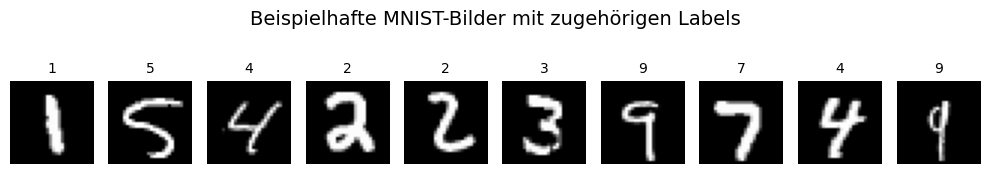

In [16]:


# 🖼️ Beispielbilder aus dem MNIST-Datensatz anzeigen
from tensorflow.keras.datasets import mnist

(x_train_demo, y_train_demo), _ = mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 2))
for i in range(10):
    idx = np.random.randint(0, x_train_demo.shape[0])
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_demo[idx], cmap="gray")
    plt.title(str(y_train_demo[idx]), fontsize=10)
    plt.axis("off")
plt.suptitle("Beispielhafte MNIST-Bilder mit zugehörigen Labels", fontsize=14)
plt.tight_layout()
plt.show()

In [17]:
from tensorflow.keras.datasets import mnist
# Laden und Normalisieren
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape für CNN: (Batch, Height, Width, Channel)
x_train = np.expand_dims(x_train, -1)  # Shape: (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# Für PyTorch: Transpose zu (Batch, Channel, Height, Width)
x_train_torch = np.transpose(x_train, (0, 3, 1, 2))
x_test_torch = np.transpose(x_test, (0, 3, 1, 2))

### PyTorch Trainingsloop

In [18]:
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

# TensorDataset erstellen
train_dataset_torch = TensorDataset(torch.tensor(x_train_torch), torch.tensor(y_train))
train_loader_torch = DataLoader(train_dataset_torch, batch_size=64, shuffle=True)

# Modell, Optimizer, Loss
model_torch = SimpleCNN_PyTorch(num_classes=10)
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)
loss_fn = nn.NLLLoss()  # LogSoftmax-Ausgabe

# Trainingsloop
def train_torch(model, dataloader, optimizer, loss_fn, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in dataloader:
            optimizer.zero_grad()
            output = model(images)
            loss = loss_fn(output, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss:.4f}")

### TensorFlow Trainingsloop

In [19]:
from tensorflow.keras.utils import to_categorical

# One-Hot-Encoding
y_train_tf = to_categorical(y_train, 10)

# Modell vorbereiten
model_tf = SimpleCNN_TensorFlow(num_classes=10)
model_tf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trainingsloop
def train_tensorflow(model, x_data, y_data, epochs=3, batch_size=64):
    model.fit(x_data, y_data, epochs=epochs, batch_size=batch_size)

## Evaluation

In [23]:
print("test_loader_torch" in locals())
print("model_torch" in locals())


False
True
